# Consumer Financial Protection Bureau: 
CFPB works to hold financial institutions accountable in matters related to financial products. CFPB contacts the relevant party on the behalf of consumer after a consumer files a complaint with it against the party. Also, it analyzes the database of complaints and takes relevant actions to deter financial institutions from indulging in abusive, misinformed and fraudulent practices.
We will be exploring the CFPB complaints database to glean some useful insights.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dateparser
%matplotlib inline

import plotly
# plotly standard imports
import plotly.graph_objs as go
import chart_studio.plotly as py

# Cufflinks wrapper on plotly
import cufflinks as cf

# Options for pandas
#pd.options.display.max_columns = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot, init_notebook_mode, plot
cf.go_offline()

init_notebook_mode(connected=True)

# Set global theme
cf.set_config_file(world_readable=True, theme='pearl')

In [2]:
#Read the Dataset
complaints = pd.read_csv("Edureka_Consumer_Complaints_train.csv")

In [3]:
complaints.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [4]:
complaints.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [5]:
#Checking for null values
complaints.isnull().any()

Date received                   False
Product                         False
Sub-product                      True
Issue                           False
Sub-issue                        True
Consumer complaint narrative     True
Company public response          True
Company                         False
State                            True
ZIP code                         True
Tags                             True
Consumer consent provided?       True
Submitted via                   False
Date sent to company            False
Company response to consumer    False
Timely response?                False
Consumer disputed?              False
Complaint ID                    False
dtype: bool

In [6]:
#Total number of null values in each column
complaints.isnull().sum()

Date received                        0
Product                              0
Sub-product                     103786
Issue                                0
Sub-issue                       219374
Consumer complaint narrative    302630
Company public response         290879
Company                              0
State                             2903
ZIP code                          2911
Tags                            308584
Consumer consent provided?      257230
Submitted via                        0
Date sent to company                 0
Company response to consumer         0
Timely response?                     0
Consumer disputed?                   0
Complaint ID                         0
dtype: int64

We see a large number of NaN values in many columns. Before we proceed further and process these NaN values let's have a look at these variables.
Sub-product: Every product doesn't have a subproduct for ex. vehicle loan . So naturally we will have some NaN values in sub-product.

Issue: Issue depends on both product and sub-product. Different products and sub-products have different issues.
Sub-Issue: Sub-issue depends on product, sub-product and issue. Hence, it is likely that it will have more NaN values.

Customer complaint: We have large number of nan values in this column. The best possible explaination of this is that customer has not given or retracted his consent on making complaint public.

Company response: This is an optional column like customer complaint.# We see a large number of NaN values in many columns.

Sub-product: Every product doesn't have a subproduct for ex. vehicle loan . So naturally we will have some NaN values in sub-product.

Issue: Issue depends on both product and sub-product. Different products and sub-products have different issues.
Sub-Issue: Sub-issue depends on product, sub-product and issue. Hence, it is likely that it will have more NaN values.

Customer complaint: We have large number of nan values in this column. The best possible explaination of this is that customer has not given or retracted his consent on making complaint public.

Company response: This is an optional column like customer complaint.

In [7]:
#Drop unnecessary columns
xnan_cols = ['Tags','Complaint ID']
complaints1 = complaints.drop(xnan_cols, axis =1)

Let's create a few variables from the date variable for analysis. 

In [8]:
#Renaming columns
complaints1.rename(columns = {'Consumer disputed?':'consumer_disputed'},inplace = True)

In [9]:
pd.DataFrame(complaints1.Product.unique())

,0
0,Credit reporting
1,Bank account or service
2,Credit card
3,Debt collection
4,Mortgage
5,Consumer Loan
6,Payday loan
7,Student loan
8,Money transfers
9,Other financial service


In [10]:
#Renaming categories
complaints1.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [11]:
pd.DataFrame(complaints1.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Bank account or service
2,Credit card or prepaid card
3,Debt collection
4,Mortgage
5,Consumer Loan
6,"Payday loan, title loan, or personal loan"
7,Student loan
8,Money transfers
9,Other financial service


The number of classes were reduced from 12 to 11. 

# PART 1-DATA EXPLORATION

### (1) What is the number of unique values and the most frequently occuring categories in the categorical columns?

In [12]:
complaints1.Product.unique()

array(['Credit reporting, repair, or other', 'Bank account or service',
       'Credit card or prepaid card', 'Debt collection', 'Mortgage',
       'Consumer Loan', 'Payday loan, title loan, or personal loan',
       'Student loan', 'Money transfers', 'Other financial service',
       'Money transfer, virtual currency, or money service'], dtype=object)

In [13]:
complaints1.Product.nunique()

11

In [14]:
fig = plt.figure(figsize=(8,6))
complaints.groupby('Product')['Product'].count().iplot(kind='bar',title='Products',fontsize=14,color='#0d0887')

<Figure size 576x432 with 0 Axes>

In Product column, there are total 11 unique Products and the most frequently occurring Product is "Mortgage".

In [15]:
complaints1['Sub-product'].unique()

array([nan, 'Other bank product/service',
       'Other (i.e. phone, health club, etc.)', 'Medical',
       'Conventional adjustable mortgage (ARM)', 'Checking account',
       'Vehicle loan', 'Other mortgage', 'Conventional fixed mortgage',
       'Credit card', 'Vehicle lease', 'Payday loan',
       'Home equity loan or line of credit', 'Installment loan',
       'VA mortgage', 'Non-federal student loan', 'I do not know',
       'Savings account', 'FHA mortgage', 'International money transfer',
       'Federal student loan servicing', '(CD) Certificate of deposit',
       'Reverse mortgage', 'Auto', 'Mortgage', 'Federal student loan',
       'Domestic (US) money transfer', 'Second mortgage',
       'Cashing a check without an account', 'Debt settlement',
       'Traveler’s/Cashier’s checks', 'Personal line of credit',
       'General purpose card', 'ID prepaid card', 'Payroll card',
       'Pawn loan', 'Check cashing', 'Government benefit payment card',
       'Transit card', 'Other 

In [16]:
complaints1['Sub-product'].nunique()

47

In [17]:
fig = plt.figure(figsize=(6,4))
complaints1.groupby('Sub-product')['Sub-product'].count().iplot(kind='bar',title='Sub-Products',fontsize=2,color='#f0f921')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In Sub-product column, there are 47 unique sub-products and the most frequently occurring sub-product is "Other mortgage".

In [18]:
complaints1.Issue.unique()

array(['Incorrect information on credit report',
       'Deposits and withdrawals', 'Other',
       'Disclosure verification of debt', 'APR or interest rate',
       'Loan modification,collection,foreclosure', 'Payoff process',
       "Cont'd attempts collect debt not owed",
       'Taking out the loan or lease',
       'Credit card protection / Debt protection',
       'Communication tactics', 'Problems caused by my funds being low',
       'Loan servicing, payments, escrow account',
       'Application, originator, mortgage broker', 'Billing disputes',
       'Identity theft / Fraud / Embezzlement',
       'Problems when you are unable to pay',
       'Account opening, closing, or management',
       'Taking/threatening an illegal action',
       'Unsolicited issuance of credit card',
       'Managing the loan or lease', 'Payment to acct not credited',
       'Settlement process and costs',
       'Improper contact or sharing of info',
       "Credit reporting company's investigation

In [19]:
complaints1.Issue.nunique()

95

In [20]:
complaints1.Issue.value_counts()

Loan modification,collection,foreclosure    60185
Incorrect information on credit report      43825
Loan servicing, payments, escrow account    38456
Cont'd attempts collect debt not owed       27266
Account opening, closing, or management     17557
                                            ...  
Lost or stolen check                           14
Incorrect exchange rate                        12
Lender damaged or destroyed vehicle             3
Lender sold the property                        2
Lender damaged or destroyed property            1
Name: Issue, Length: 95, dtype: int64

In Issue column, there are 95 unique issues and the most frequently occurring issue is "Loan modification,collection,foreclosure".

In [21]:
complaints1['Sub-issue'].unique()

array(['Information is not mine', nan,
       'Not given enough info to verify debt', 'Debt is not mine',
       'Debt was paid', 'Threatened to take legal action',
       'Frequent or repeated calls', 'Seized/Attempted to seize property',
       'Payment to acct not credited', 'Public record',
       'Debt was discharged in bankruptcy', 'Account status',
       'Talked to a third party about my debt',
       'No notice of investigation status/result',
       'Inadequate help over the phone',
       "Can't temporarily postpone payments",
       "Can't decrease my monthly payments",
       'Contacted employer after asked not to',
       'Debt resulted from identity theft',
       'Problem getting report or credit score', 'Repaying your loan',
       'Attempted to collect wrong amount',
       'Trouble with how payments are handled',
       'Problem getting my free annual report',
       'Right to dispute notice not received', 'Account terms',
       "Can't contact lender", 'Attempted to

In [22]:
complaints1['Sub-issue'].nunique()

67

In [23]:
complaints1['Sub-issue'].value_counts()

Account status                              17142
Debt is not mine                            16772
Information is not mine                     13199
Not given enough info to verify debt         8451
Debt was paid                                7372
                                            ...  
Receiving unwanted marketing/advertising      112
Contacted me instead of my attorney           104
Received marketing offer after opted out       87
Report shared with employer w/o consent        82
Qualify for a better loan than offered         65
Name: Sub-issue, Length: 67, dtype: int64

In Sub-issue column, there are 95 unique sub-issues and the most frequently occurring sub-issue is "Account status".

In [24]:
complaints1['Company'].unique()

array(['Equifax', 'Wells Fargo & Company', 'Citibank', ...,
       'Balekian Hayes, PLLC', 'ALE Solutions, Inc.',
       'National Loan Investors, LP'], dtype=object)

In [25]:
complaints1['Company'].nunique()

3064

In [26]:
complaints1['Company'].value_counts()

Bank of America                                               34903
Wells Fargo & Company                                         26490
JPMorgan Chase & Co.                                          21677
Equifax                                                       21489
Experian                                                      20075
                                                              ...  
Innovative Mortgage Services, Inc.                                1
CMM, LLC                                                          1
Wisconsin Housing & Economic Development Authority (WHEDA)        1
Houston Home Loan, Inc.                                           1
Cumulus Funding LLC                                               1
Name: Company, Length: 3064, dtype: int64

In Company column, there are 3064 unique company and the most frequently occurring company is "Bank of America".

In [27]:
complaints1['State'].unique()

array(['GA', 'SC', 'OH', 'CA', 'FL', 'NJ', 'IL', 'PA', 'ID', 'UT', 'TX',
       'TN', 'NM', 'VA', 'MO', 'KY', 'MN', 'IN', 'MD', 'WI', 'NY', 'KS',
       'CO', 'AZ', 'OK', 'MI', 'CT', 'LA', 'OR', 'NC', 'MS', 'NH', 'AL',
       'MA', 'WA', 'DC', 'AR', nan, 'VI', 'DE', 'NV', 'IA', 'WV', 'NE',
       'VT', 'ME', 'ND', 'HI', 'RI', 'WY', 'SD', 'PR', 'FM', 'MT', 'AK',
       'AE', 'GU', 'AP', 'MH', 'AS', 'MP', 'PW', 'AA'], dtype=object)

In [28]:
complaints1['State'].nunique()

62

In [29]:
complaints1['State'].value_counts()

CA    52368
FL    34567
TX    26683
NY    24554
GA    15886
      ...  
MH       19
MP       13
AS        9
PW        8
AA        7
Name: State, Length: 62, dtype: int64

In state column, there are 62 unique states and the most frequently occurring state is "CA"(California).

In [30]:
complaints1['Consumer consent provided?'].unique()

array(['Consent not provided', 'Consent provided', nan, 'Other',
       'Consent withdrawn'], dtype=object)

In [31]:
complaints1['Consumer consent provided?'].nunique()

4

In [32]:
fig = plt.figure(figsize=(8,6))
complaints1.groupby('Consumer consent provided?')['Consumer consent provided?'].count().iplot(kind='bar',title='Consumer consent Provided',fontsize=2,color= '#46039f')
plt.show()

<Figure size 576x432 with 0 Axes>

In "Consent Provided?" column, there are 4 unique values  and the most frequently occurring value is "Consent provided".

In [33]:
complaints1['Submitted via'].unique()

array(['Web', 'Phone', 'Referral', 'Postal mail', 'Fax', 'Email'],
      dtype=object)

In [34]:
complaints1['Submitted via'].nunique()

6

In [35]:
fig = plt.figure(figsize=(8,6))
complaints1.groupby('Submitted via')['Submitted via'].count().iplot(kind='bar',title='Submitted medium',fontsize=2,color= '#9c179e')
plt.show()

<Figure size 576x432 with 0 Axes>

In "Submitted via" column, there are 6 unique values  and the most of the time,it is submitted via "Web".

In [36]:
complaints1['Company response to consumer'].unique()

array(['Closed with explanation', 'Closed with non-monetary relief',
       'Closed with relief', 'Closed without relief',
       'Closed with monetary relief', 'Closed'], dtype=object)

In [37]:
complaints1['Company response to consumer'].nunique()

6

In [38]:
fig = plt.figure(figsize=(8,6))
complaints1.groupby('Company response to consumer')['Company response to consumer'].count().iplot(kind='bar',title='Company response to Consumer',fontsize=2,color= '#fdca26')
plt.show()

<Figure size 576x432 with 0 Axes>

In "Company response to consumer" column, there are 6 unique values  and the most frequently occurring response is "Closed with explanation".

In [39]:
complaints1['Timely response?'].unique()

array(['Yes', 'No'], dtype=object)

In [40]:
complaints1['Timely response?'].nunique()

2

In [41]:
fig = plt.figure(figsize=(8,6))
complaints1.groupby('Timely response?')['Timely response?'].count().iplot(kind='bar',title='Timely Response',fontsize=2,color= '#d8576b')
plt.show()

<Figure size 576x432 with 0 Axes>

In "Timely response?" column, there are 2 unique values  and the most of the times ,it is timely responsed.

In [42]:
complaints1['consumer_disputed'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
complaints1['consumer_disputed'].nunique()

2

In [44]:
fig = plt.figure(figsize=(8,6))
complaints1.groupby('consumer_disputed')['consumer_disputed'].count().iplot(kind='bar',title='Consumer Disputed',fontsize=2,color='#fb9f3a')
plt.show()

<Figure size 576x432 with 0 Axes>

In "consumer_disputed" column, there are 2 unique values  and the most of the times ,it is not disputed.It is the target variable and it is imbalanced.So we had to look into this also.

### (2) Can you identify the top issues raised by consumers in this dataset?

In [45]:
sns.set(style='white')
complaints1['Issue'].str.strip("'").value_counts()[0:10].iplot(kind='bar',title='Top 10 issues',fontsize=14,color='#7070FF')

We find that, most complaints received by the CFPB are on Loan modification, collection, and foreclosure, followed by complaints on Incorrect information on credit report.

In [46]:
complaints1['Sub-issue'].str.strip("'").value_counts()[0:10].iplot(kind='bar',
                                                          title='Top 10 Sub Issues',fontsize=14,color='#9370DB')

Most customers complained about their Account Status being incorrect, being incorrectly assigned debt, and incorrect information.

### (3) Are there some products which receive a higher number of complaints? 

In [47]:
complains_flag = '1'*len(complaints1['Product'])
complaints1['complains'] = [ int(x) for x in complains_flag if not x  == ',']
consumer_complaint_product_wise = complaints1.groupby('Product').aggregate(np.sum)
consumer_complaint_product_wise.iplot(kind = 'bar',title='Products vs Complains')

(-0.5, 2999.5, 1999.5, -0.5)

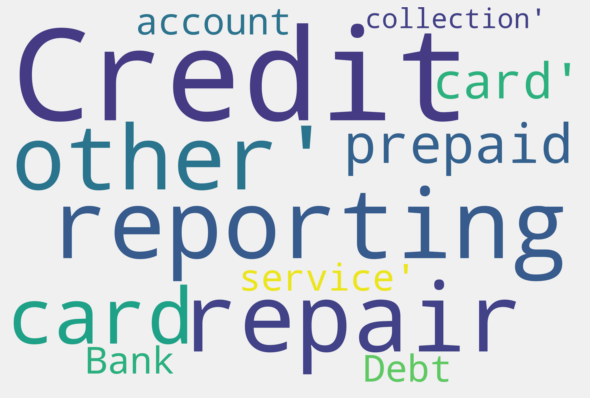

In [48]:
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline
text = complaints1['Product'].values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = '#F0F0F0',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (8, 8),
    facecolor = '#F0F0F0',
    edgecolor = '#F0F0F0')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

Mortgage, Debt collection, Credit reporting, Credit Card are some of Products that receive more number of Complaints.

### (4) Do all the companies receive the same number of complaints?

In [49]:
consumer_complaint_company_wise = complaints1.groupby('Company').aggregate(np.sum)

Company with more than 10000 number of complains 

In [50]:
consumer_complaint_company_wise[consumer_complaint_company_wise['complains'] > 10000].iplot(kind = 'bar',title='Companies vs complains')

We can see that not all companies recieve same number of complaints and the company with most number of complains in Bank of America. 

### (5) How are the complaints submitted - through which medium? 

In [51]:
pd.crosstab(complaints1['Timely response?'],complaints1['Submitted via']).sort_index().iplot(kind='bar',barmode='stack',title='Timely Response vs Submitted via')

It is found that, complaints submitted via Web got a faster response. 

### (6) What is the geographical distribution of the complaints? 

In [52]:
states = complaints1['State'].value_counts()

scl = [
    [0.0, 'rgb(242,240,247)'],
    [0.2, 'rgb(218,218,235)'],
    [0.4, 'rgb(188,189,220)'],
    [0.6, 'rgb(158,154,200)'],
    [0.8, 'rgb(117,107,177)'],
    [1.0, 'rgb(84,39,143)']
]

data = [go.Choropleth(
    colorscale = scl,
    autocolorscale = False,
    locations = states.index,
    z = states.values,
    locationmode = 'USA-states',
    text = states.index,
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Complaints")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Complaints by State<br>(Hover for breakdown)'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(100,149,237)'),
)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

It is shown, that the state of California (CA), received the highest number of complaints. 

### (7) Do the complaints rise in any specific month or day of the week? 

In this section, we extract the date features from the Date received field. To achieve this, we import the datetime library:

In [53]:
# library of datetime
from datetime import datetime

In [54]:
complaints1['Date'] = pd.to_datetime(complaints1['Date received']) # seting the column as pandas datetime
complaints1['Year'] = complaints1['Date'].dt.year # extracting year
complaints1['Month'] = complaints1['Date'].dt.month # extracting month
complaints1['Weekday_name'] = complaints1['Date'].dt.day_name() # extracting name of the weekday
complaints1['Year_month'] = complaints1.Year.astype(str).str.cat(complaints1.Month.astype(str), sep='-')

In [55]:
pd.crosstab(complaints1['Year'],complaints1['Month']).iplot(kind='bar',barmode='stack',title='Number of Complaints per Month')

In [56]:
complaints1["Weekday_name"].value_counts().iplot(kind='barh',title='Number of Complaints per Weekday',color='cornflowerblue')

We find that, there has been a steady increase in the number of complaints since January 2012, with most complaints being received around the middle of the week.

### (8) How do companies respond to the complaints? What are the most common responses received?

In [57]:
prod_dist = complaints1.groupby(['Company response to consumer']).size()
trace = go.Pie(labels=prod_dist.index, values=prod_dist,title='Company Response to the Customer')
iplot([trace])

We further find that, most complaints were Closed with explanation. With about 7% being closed with monetary relief. 

### (9) Does responding to complaints in a timely manner alter the number of consumers that disputed the company response and those that did not?

In [58]:
test = pd.crosstab(complaints1['Timely response?'],complaints1['consumer_disputed'])#.apply(lambda x: x/x.sum() * 100).astype(int)
cm = sns.light_palette("blue", as_cmap=True)

test.style.background_gradient(cmap=cm)

consumer_disputed,No,Yes
Timely response?,,
No,4906,1229
Yes,277732,74943


In [59]:
complaint_dis = complaints1.copy()
complaint_dis[complaint_dis['consumer_disputed']=='Yes'] = 'Disputed'
complaint_dis[complaint_dis['consumer_disputed']=='No'] = 'Not Disputed'

In [60]:
pd.crosstab(complaints1['Timely response?'],complaint_dis['consumer_disputed']).iplot(kind='bar',title='Timely Response vs Consumer Disputed')

It is found that, most consumers that received a timely response did not dispute the companies response.

# PART 2-TEXT BASED MODELLING

In [61]:
complaints2 = complaints1[['Product', 'Consumer complaint narrative']]

# Remove missing values (NaN)
complaints2 = complaints2[pd.notnull(complaints2['Consumer complaint narrative'])]

# Renaming second column for a simpler name
complaints2.columns = ['Product', 'Consumer complaint narrative'] 

complaints2.shape

(56180, 2)

In [62]:
#Because the computation is time consuming (in terms of CPU), the data was sampled
complaints3 = complaints2.sample(4000, random_state=1).copy()

Now we need to represent each class as a number, so as our predictive model can better understand the different categories.

In [63]:
complaints3['category_id'] = complaints3['Product'].factorize()[0]
category_id_df = complaints3[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
complaints3.head()

,Product,Consumer complaint narrative,category_id
263141,Debt collection,I have been getting robo calls from a debt col...,0
263075,Mortgage,I opend a mortgage with Washington Mutual in X...,1
250181,Bank account or service,I filed a complaint years ago and it was resol...,2
35472,Consumer Loan,I am writing to file a complaint against Prest...,3
285854,Bank account or service,Opened a BUSINESS checking account at US BANK ...,2


<Figure size 576x432 with 0 Axes>

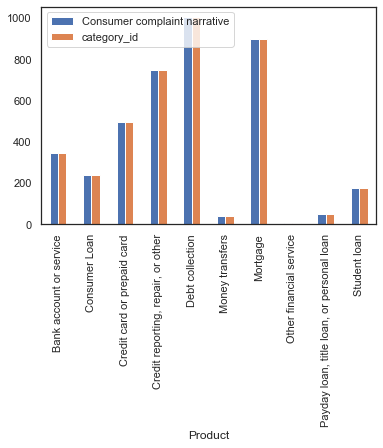

In [64]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
complaints3.groupby('Product').count().plot.bar(ylim=0)
plt.show()

The data looks imbalanced.

When we encounter such problems, we are bound to have difficulties solving them with standard algorithms. Conventional algorithms are often biased towards the majority class, not taking the data distribution into consideration. In the worst case, minority classes are treated as outliers and ignored.

For some cases, such as fraud detection or cancer prediction, we would need to carefully configure our model or artificially balance the dataset, for example by undersampling or oversampling each class.

However, in our case of learning imbalanced data, the majority classes might be of our great interest. It is desirable to have a classifier that gives high prediction accuracy over the majority class, while maintaining reasonable accuracy for the minority classes. Therefore, we will leave it as it is.

We will calculate a measure called Term Frequency, Inverse Document Frequency, abbreviated to tf-idf.

We will use sklearn.feature_extraction.text.TfidfVectorizer to calculate a tf-idf vector for each of consumer complaint narratives:

    1.sublinear_df is set to True to use a logarithmic form for frequency.
    2.min_df is the minimum numbers of documents a word must be present in to be kept.
    3.norm is set to l2, to ensure all our feature vectors have a euclidian norm of 1.
    4.ngram_range is set to (1, 2) to indicate that we want to consider both unigrams and bigrams.
    5.stop_words is set to "english" to remove all common pronouns ("a", "the", ...) to reduce the number of noisy features.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(complaints3['Consumer complaint narrative']).toarray()

labels = complaints3.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 4000 complaints is represented by 11318 features (TF-IDF score of unigrams and bigrams)


In [66]:
# Finding the three most correlated terms with each of the product categories
from sklearn.feature_selection import chi2
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: atm, deposit, overdraft
  * Most Correlated Bigrams are: debit card, checking account, overdraft fees

==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, vehicle, car
  * Most Correlated Bigrams are: gm financial, ally financial, auto loan

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: citi, rewards, card
  * Most Correlated Bigrams are: american express, card xxxx, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: transunion, experian, equifax
  * Most Correlated Bigrams are: equifax xxxx, report xxxx, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt xxxx, collection agency, collect debt

==> Money transfers:
  * Most Correlated Unigrams are: receiver, moneygram, western
  * Most Correlated Bigrams are: paypal account, sent money, western union

==> Mortgage:
  * Most

#### Multi-Class Classification 

The classification models evaluated are:

    Random Forest
    Linear Support Vector Machine
    Multinomial Naive Bayes
    Logistic Regression.


Spliting the data into train and test sets

The original data was divided into features (X) and target (y), which were then splitted into train (75%) and test (25%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [68]:
X = complaints3['Consumer complaint narrative'] # Collection of documents
y = complaints3['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 0)

##### Models 

In [69]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 4 Cross-validation
CV = 4
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.525
1,RandomForestClassifier,1,0.557
2,RandomForestClassifier,2,0.543
3,RandomForestClassifier,3,0.539
4,LinearSVC,0,0.814
5,LinearSVC,1,0.797
6,LinearSVC,2,0.817
7,LinearSVC,3,0.816
8,MultinomialNB,0,0.678
9,MultinomialNB,1,0.675


#### Comparison of Model Performance

The best mean acuracy was obtained with LinearSVC.

In [70]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.81100,0.009416
LogisticRegression,0.78625,0.013745
MultinomialNB,0.68350,0.009327
RandomForestClassifier,0.54100,0.013166


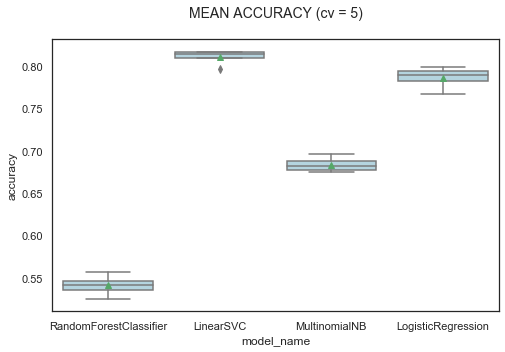

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

In [72]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels,complaints3.index, test_size=0.25,random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [73]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= complaints3['Product'].unique()))

				CLASSIFICATIION METRICS

                                           precision    recall  f1-score   support

                          Debt collection       0.77      0.85      0.81       260
                                 Mortgage       0.86      0.95      0.90       218
                  Bank account or service       0.79      0.66      0.72        79
                            Consumer Loan       0.78      0.45      0.57        62
       Credit reporting, repair, or other       0.75      0.84      0.79       183
              Credit card or prepaid card       0.77      0.80      0.79       119
                             Student loan       0.84      0.60      0.70        52
Payday loan, title loan, or personal loan       0.00      0.00      0.00        14
                  Other financial service       0.00      0.00      0.00         1
                          Money transfers       1.00      0.50      0.67        12

                                 accuracy               

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



It is possible to observe that the classes with more support (number of occurrences) tend to have a better f1-cscore. This is because the algorithm was trained with more data.

The classes that can be classified with more precision are ‘Mortgage’, ‘Credit reporting, repair, or other’, and ‘Student loan’.

#### Confusion Matrix 

A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class.

If we had a perfect model that always classifies correctly a new complaint, then the confusion matrix would have values in the diagonal only (where predicted label = actual label).

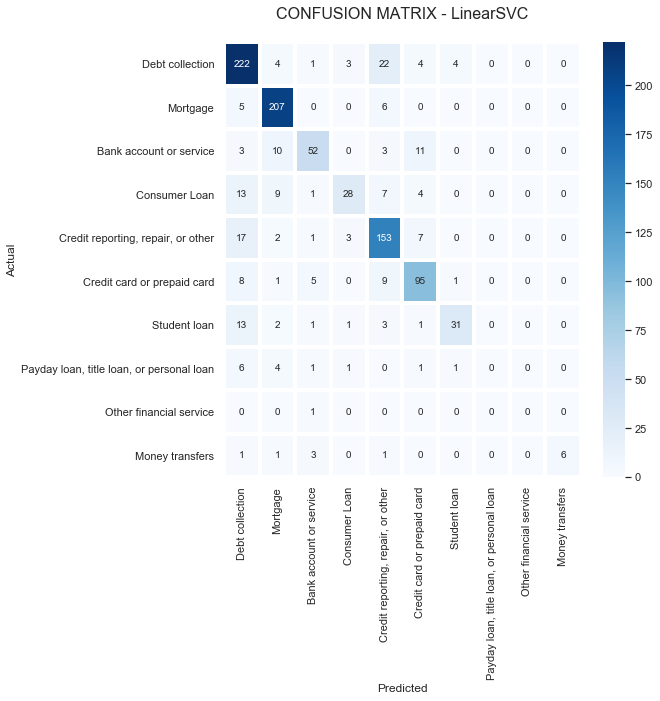

In [74]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values,linecolor='white',linewidths=3)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

In general, the confusion matrix looks good (clear diagonal that represents correct classifications). Nevertheless, there are cases were the complaint was classified in a wrong class.

#### Misclassified complaints 

Let’s have a look at the cases that were wrongly classified.

In [75]:
for predicted in category_id_df.category_id:
    for actual in category_id_df.category_id:
        if predicted != actual and conf_mat[actual, predicted] >= 10:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],id_to_category[predicted],conf_mat[actual, predicted]))
            display(complaints3.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product','Consumer complaint narrative']])
            print('')

'Consumer Loan' predicted as 'Debt collection' : 13 examples.


,Product,Consumer complaint narrative
168485,Consumer Loan,I am currently 2 weeks behind on my loan with ...
54805,Consumer Loan,"Hi, I am very frustrated with XXXX program. Wh..."
82524,Consumer Loan,"When my new car was totaled, the dealership re..."
330867,Consumer Loan,I have a loan through TD auto finance. I have ...
77983,Consumer Loan,BOUGHT THE CAR NOW EVEN XXXX WEEKS AGO. HAD TO...
12900,Consumer Loan,I am writing to see if I can do anything about...
287408,Consumer Loan,Consumer Portfolio Services called my office a...
125734,Consumer Loan,"Loan were charge off, went to collection ... h..."
35472,Consumer Loan,I am writing to file a complaint against Prest...
133360,Consumer Loan,"There are XXXX issues, I will describe them se..."



'Credit reporting, repair, or other' predicted as 'Debt collection' : 17 examples.


,Product,Consumer complaint narrative
249040,"Credit reporting, repair, or other","I initially disputed an account, which came ba..."
296476,"Credit reporting, repair, or other",I am a Veteran and I was having a medical emer...
10976,"Credit reporting, repair, or other",Friendly foot care submitted payment to the wr...
161173,"Credit reporting, repair, or other",Trans union is showing a old debt against me o...
99762,"Credit reporting, repair, or other",wrong employer info
113382,"Credit reporting, repair, or other",XXXX has never provided a full accounting of d...
28118,"Credit reporting, repair, or other",I have disputed a collection account with LVNV...
139499,"Credit reporting, repair, or other","I was unaware of the {$230.00} debt, as I neve..."
201,"Credit reporting, repair, or other",I discovered my fico score said I have XXXX co...
3356,"Credit reporting, repair, or other",Tax Lein paid off before sent to collections d...



'Student loan' predicted as 'Debt collection' : 13 examples.


,Product,Consumer complaint narrative
357029,Student loan,I was asked to get a loan for XXXX school that...
126691,Student loan,Sallie Mae harrasses people to no end. I have ...
193269,Student loan,The Northland Group on behalf of XXXX continue...
295612,Student loan,"XXXX XXXX University in XXXX, Indiana is where..."
198615,Student loan,I have been getting numerous phone calls on my...
241670,Student loan,"Every year I receive a letter showing the "" in..."
133422,Student loan,"In XXXX of 2016, I arranged to settle my accou..."
236269,Student loan,My loan debt is zero. I 've received all lette...
5955,Student loan,Sallie Mae ( XXXX ) has charged me far more in...
65848,Student loan,"Navient Has constantly been calling family, fr..."



'Bank account or service' predicted as 'Mortgage' : 10 examples.


,Product,Consumer complaint narrative
135046,Bank account or service,I am a first time home buyer attempting to pur...
39566,Bank account or service,New York Community Bank - Avoid them if you ca...
217405,Bank account or service,I bought an investment home the rent was suppo...
342705,Bank account or service,I am the Trustee for the estate of my aunt and...
137082,Bank account or service,I contracted with XXXX XXXX Movers for service...
242648,Bank account or service,I have a loan that originated with XXXX XXXX. ...
214844,Bank account or service,I have Wells Fargo Business Accounts. When I v...
325168,Bank account or service,I have had Nationwide BiWeekly Administration ...
202283,Bank account or service,I am currently a consumer of Bank of America p...
72626,Bank account or service,I applied for and received a mortgage in XXXX ...



'Debt collection' predicted as 'Credit reporting, repair, or other' : 22 examples.


,Product,Consumer complaint narrative
95305,Debt collection,Upon the end of my lease and moving out of XXX...
118805,Debt collection,There are XXXX accounts on my credit report th...
130627,Debt collection,I file a Police Report as you will see in the ...
189775,Debt collection,stellar recovery dba XXXX keeps putting open a...
266330,Debt collection,ERC XXXX was put on my credit report and I cal...
3617,Debt collection,XXXX HAS CONTINUE TO REPORT AND ACCOUNT THATS ...
104942,Debt collection,"Due to a subprime loan by XXXX XXXX XXXX, I lo..."
276889,Debt collection,At the time I was married and under XXXX XXXX....
89617,Debt collection,A few months ago I created an account on the X...
312045,Debt collection,Lived at an apartment complex five years ago. ...



'Bank account or service' predicted as 'Credit card or prepaid card' : 11 examples.


,Product,Consumer complaint narrative
98006,Bank account or service,XXXX XXXX Chase has put on my credit report fo...
17857,Bank account or service,I purchased a {$500.00} reload pack from XXXX ...
63207,Bank account or service,I applied for a Citigold bank account with Cit...
236936,Bank account or service,I recently attempted to make a purchase via th...
105184,Bank account or service,I noticed several charges come through on my d...
116487,Bank account or service,have fraudulant charges on my card ... .did re...
79177,Bank account or service,Changing account type without authorization My...
260915,Bank account or service,PayPal conducted an unauthorized credit inquir...
190408,Bank account or service,American Express Company has closed my America...
181738,Bank account or service,I have a Direct Express XXXX XXXX Comerica Ban...


#### Most correlated terms with each category
 

In [76]:
model.fit(features, labels)

N = 4
for Product, category_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[category_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(Product))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


==> 'Bank account or service':
  * Top unigrams: bank, deposit, account, branch
  * Top bigrams: debit card, closed account, fargo account, contacted xxxx

==> 'Consumer Loan':
  * Top unigrams: car, vehicle, loan, ally
  * Top bigrams: auto loan, pay loan, ally financial, 00 reason

==> 'Credit card or prepaid card':
  * Top unigrams: card, capital, discover, citi
  * Top bigrams: credit card, dispute xxxx, access account, debt report

==> 'Credit reporting, repair, or other':
  * Top unigrams: equifax, experian, transunion, report
  * Top bigrams: pay time, car loan, trans union, xxxx bank

==> 'Debt collection':
  * Top unigrams: debt, collection, calling, recovery
  * Top bigrams: collection agency, debt xxxx, company reporting, debt paid

==> 'Money transfers':
  * Top unigrams: money, western, transfer, moneygram
  * Top bigrams: western union, paypal account, sent money, sending money

==> 'Mortgage':
  * Top unigrams: mortgage, modification, loan, escrow
  * Top bigrams: charg

#### Predictions 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,ngram_range=(1, 2),stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

Let's see what is the classification that our model gives to this new complaint.

In [78]:
new_complaint = """I have been getting robo calls from a debt collection agency called " Alliance 1 \'\' for over XXXX months. The calls average XXXX times per week. They are attempting to collect a debt for someone whose name sounds like " XXXX XXXX \'\'. I am sick and tired of their harrassement and want the calls to stop. \n"""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Debt collection']


The algorithm has classified this text as a "Debt collection" complaint. Now let's look at the real label of this complaint.

In [79]:
complaints3[complaints3['Consumer complaint narrative'] == new_complaint]

,Product,Consumer complaint narrative,category_id
263141,Debt collection,I have been getting robo calls from a debt col...,0


Our model was correct, the complaint was about Debt collection.

Although our model is not going to be all the time correct when classifying new complaints, it does a good job.

# PART 3- CLASSIFICATION MODELS AND FEATURE ENGINEERING

The Goal is to analyze and build prediction model to predict which consumer is more likely to dispute the resolution of a complaint. Make predictions for the "Consumer disputed" column.

In [80]:
complaints_test = pd.read_csv('Edureka_Consumer_Complaints_test.csv')
complaints_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [81]:
complaints_train = pd.read_csv('Edureka_Consumer_Complaints_train.csv')
complaints_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


#  

#### Imputing null values in train set

In [82]:
complaints_train['Date received'] = pd.to_datetime(complaints_train['Date received'])
complaints_train['Date sent to company'] = pd.to_datetime(complaints_train['Date sent to company'])
complaints_train['Sub-product'].fillna('Not Provided',inplace=True)
complaints_train['Sub-issue'].fillna('Not Provided',inplace=True)
complaints_train['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
complaints_train['Company public response'].fillna('Company chooses not to provide',inplace=True)
complaints_train['Issue'].fillna('Other',inplace=True)
complaints_train['Tags'].fillna('Unknown',inplace=True)
complaints_train['Submitted via'].fillna('Other',inplace=True)
complaints_train['Consumer consent provided?'].fillna('Consent not provided',inplace=True)
complaints_train['Consumer consent provided?'] = complaints_train['Consumer consent provided?'].apply(lambda x:
                        'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)
complaints_train['State'].fillna('Not provided',inplace=True)
complaints_train['ZIP code'].fillna('Not provided',inplace=True)
complaints_train.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,Not Provided,Incorrect information on credit report,Information is not mine,None or Not Provided,Company chooses not to provide,Equifax,GA,30134,Unknown,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Not Provided,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,Company chooses not to provide,Wells Fargo & Company,GA,319XX,Unknown,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613


#### Imputing null values in test set

In [83]:
complaints_test['Date received'] = pd.to_datetime(complaints_test['Date received'])
complaints_test['Date sent to company'] = pd.to_datetime(complaints_test['Date sent to company'])
complaints_test['Sub-product'].fillna('Not Provided',inplace=True)
complaints_test['Sub-issue'].fillna('Not Provided',inplace=True)
complaints_test['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
complaints_test['Company public response'].fillna('Company chooses not to provide',inplace=True)
complaints_test['Issue'].fillna('Other',inplace=True)
complaints_test['Tags'].fillna('Unknown',inplace=True)
complaints_test['Submitted via'].fillna('Other',inplace=True)
complaints_test['Consumer consent provided?'].fillna('Consent not provided',inplace=True)
complaints_test['Consumer consent provided?'] = complaints_test['Consumer consent provided?'].apply(lambda x:
                        'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)
complaints_test['State'].fillna('Not provided',inplace=True)
complaints_test['ZIP code'].fillna('Not provided',inplace=True)
complaints_test.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,Not Provided,Customer service / Customer relations,Not Provided,None or Not Provided,Company chooses not to provide,Citibank,TX,75241,Unknown,Consent not provided,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,Not Provided,None or Not Provided,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,Consent not provided,Phone,2016-06-22,Closed with explanation,Yes,1979989


#### Creating features from train data 

In [84]:
df_model = pd.DataFrame()
replace1 = {'Consent provided': True,'Consent not provided': False}
df_model['Consumer consent provided?'] = complaints_train['Consumer consent provided?'].apply(lambda x: replace1[x])
company_complaints_counts = complaints_train['Company'].value_counts()
df_model['company_complaints_counts'] = complaints_train['Company'].apply(lambda x: company_complaints_counts[x])

feature_for_model = ['Product','Sub-product','Issue','Sub-issue','Company public response','Tags','Company response to consumer','State']
for name in feature_for_model:
    repl={}
    i=0
    for value in complaints_train[name].unique():
        repl[value] = i
        i+=1
        
    complaints_train[name] = complaints_train[name].apply(lambda x: repl[x])
    complaints_train[name] = complaints_train[name].astype('category')
    
df_model['Date_received_year'] = complaints_train['Date received'].apply(lambda x:x.year)
df_model['Date_received_month'] = complaints_train['Date received'].apply(lambda x:x.month)
df_model['Date_received_day'] = complaints_train['Date received'].apply(lambda x:x.day)

df_model.head()

,Consumer consent provided?,company_complaints_counts,Date_received_year,Date_received_month,Date_received_day
0,False,21489,2015,10,14
1,True,26490,2015,4,26
2,False,16792,2013,12,20
3,False,217,2016,3,3
4,False,179,2015,1,30


#### Creating same features from test data

In [85]:
df_model_test = pd.DataFrame()
replace1 = {'Consent provided': True,'Consent not provided': False}
df_model_test['Consumer consent provided?'] = complaints_test['Consumer consent provided?'].apply(lambda x: replace1[x])
company_complaints_counts = complaints_test['Company'].value_counts()
df_model_test['company_complaints_counts'] = complaints_test['Company'].apply(lambda x: company_complaints_counts[x])

feature_for_model = ['Product','Sub-product','Issue','Sub-issue','Company public response','Tags','Company response to consumer','State']
for name in feature_for_model:
    repl={}
    i=0
    for value in complaints_test[name].unique():
        repl[value] = i
        i+=1
        
    complaints_test[name] = complaints_test[name].apply(lambda x: repl[x])
    complaints_test[name] = complaints_test[name].astype('category')
    
df_model_test['Date_received_year'] = complaints_test['Date received'].apply(lambda x:x.year)
df_model_test['Date_received_month'] = complaints_test['Date received'].apply(lambda x:x.month)
df_model_test['Date_received_day'] = complaints_test['Date received'].apply(lambda x:x.day)

df_model_test.head()

,Consumer consent provided?,company_complaints_counts,Date_received_year,Date_received_month,Date_received_day
0,False,5508,2015,1,17
1,False,1,2016,6,22
2,True,3314,2015,9,4
3,True,168,2016,5,17
4,True,14,2016,7,7


#### Split the Data 

In [86]:
X = df_model.values
y = complaints_train['Consumer disputed?'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### Scaling the Data

In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_data = scaler.transform(df_model_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

#### Hyperparameter Tuning and Model Building

Here we will try model like Logistic regression.
We should try and find the best hyperparameters by searching through a bunch of combinations to get better prediction metrics.

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [90]:
#Logistic Regression
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=1,random_state=1)
model_lr = LogisticRegression()
space_lr = dict()
space_lr['solver']=['newton-cg','lbfgs','liblinear']
space_lr['penalty']=['l1','l2','elasticnet']
space_lr['C']=loguniform(1e-5,100)

search_lr = RandomizedSearchCV(model_lr,space_lr,scoring='accuracy',n_jobs=-1,cv=cv,random_state=1)
result_lr = search_lr.fit(X_train,y_train)
print('Best Score: %s' % result_lr.best_score_)
print('Best Hyperparameters: %s' % result_lr.best_params_)
print('Test Score: %s' % result_lr.score(X_test,y_test))

Best Score: 0.7877288816138694
Best Hyperparameters: {'C': 1.0018452045446539e-05, 'penalty': 'l2', 'solver': 'newton-cg'}
Test Score: 0.7876313369192609


#### Final Prediction on Test Data

In [ ]:
final_model = LogisticRegression(C=1.0018452045446539e-05, penalty='l2', solver= 'newton-cg')
final_train = final_model.fit(X_train,y_train)
final_test_pred = final_model.predict(test_data)
test_pred = pd.Series(final_test_pred)
print(test_data)

In [97]:
test_pred.to_excel('Prediction on Test Data.xlsx', index = False)